<a href="https://colab.research.google.com/github/hecjhern/Procesamiento-de-Datos/blob/main/Alumno_Clustering_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering o agrupamiento

La idea principal de aplicar el clustering es para poder organizar los puntos que se dibujan en un plan en diferentes categorias o grupos. 

## K medias

El algortimo de kmedias es uno de los mas simples y famosos ejemplos que podemos escuchar de los algoritmos de clustering. Estos son los pasos que se realizan para llevarlo a cabo:

- Se selecciona el numero de clusters k que pienses que es numero optimo.
- Se inicializan los k puntos como centroides de manera aleatoria dentro del espacio en donde estan distribuidos nuestros datos.
- Relacionamos cada observacion son el centroide mas cercano.
- Los centroides se actualizan al centro de todos los datos que se le atribuyeron en el paso anterior.
- Estos ultimos dos pasos se repetiran hasta que todos los centroides esten estables.





A continuacion utilizaremos las herramientas que vimos en la clase asada para generar datos dummy y ejemplificar el uso del clustering.

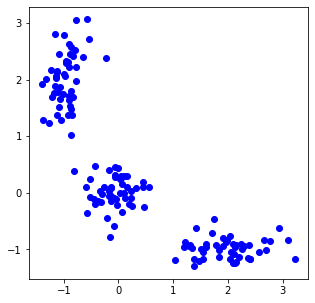

In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

X = np.zeros((150, 2))

np.random.seed(seed=42)
X[:50, 0] = np.random.normal(loc=0.0, scale=.3, size=50)
X[:50, 1] = np.random.normal(loc=0.0, scale=.3, size=50)

X[50:100, 0] = np.random.normal(loc=2.0, scale=.5, size=50)
X[50:100, 1] = np.random.normal(loc=-1.0, scale=.2, size=50)

X[100:150, 0] = np.random.normal(loc=-1.0, scale=.2, size=50)
X[100:150, 1] = np.random.normal(loc=2.0, scale=.5, size=50)

plt.figure(figsize=(5, 5))
plt.plot(X[:, 0], X[:, 1], 'bo');

In [2]:
from scipy.spatial.distance import cdist

# Randomly allocate the 3 centroids 
np.random.seed(seed=42)
centroids = np.random.normal(loc=0.0, scale=1., size=6)
centroids = centroids.reshape((3, 2))

cent_history = []
cent_history.append(centroids)

for i in range(3):
    # Calculating the distance from a point to a centroid
    distances = cdist(X, centroids)
    # Checking what's the closest centroid for the point
    labels = distances.argmin(axis=1)
    
    # Labeling the point according the point's distance
    centroids = centroids.copy()
    centroids[0, :] = np.mean(X[labels == 0, :], axis=0)
    centroids[1, :] = np.mean(X[labels == 1, :], axis=0)
    centroids[2, :] = np.mean(X[labels == 2, :], axis=0)
    
    cent_history.append(centroids)

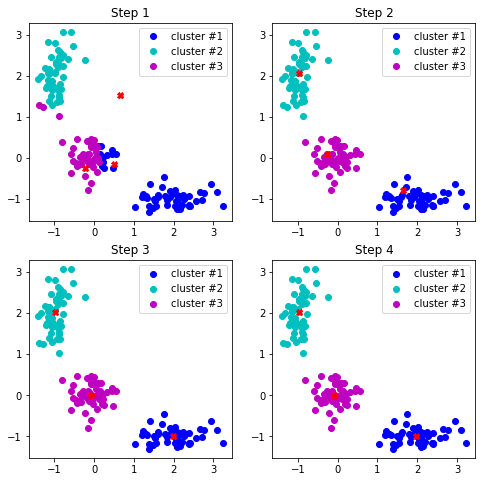

In [3]:
plt.figure(figsize=(8, 8))
for i in range(4):
    distances = cdist(X, cent_history[i])
    labels = distances.argmin(axis=1)
    
    plt.subplot(2, 2, i + 1)
    plt.plot(X[labels == 0, 0], X[labels == 0, 1], 'bo', label='cluster #1')
    plt.plot(X[labels == 1, 0], X[labels == 1, 1], 'co', label='cluster #2')
    plt.plot(X[labels == 2, 0], X[labels == 2, 1], 'mo', label='cluster #3')
    plt.plot(cent_history[i][:, 0], cent_history[i][:, 1], 'rX')
    plt.legend(loc=0)
    plt.title('Step {:}'.format(i + 1));

Como vemos comunmente, en este ejemplo utilizamos la medida de distancia euclidiana (el algoritmo va a converger con cualquier otra metrica). Algunas de las caracteristicas que puedes tomar en cuenta para poder mejorar o cambiar tus resultados es el criterio de convergencia o la medida de distancia que utilizas entre los puntos de los datos y los centroides.

### ¿Como podemos eleguir el criterio de numero de clusters?

Haciendo contraste con herramientas de aprendizaje supervisado, en donde tenemos problemas de clasificacion o regresion, el agrupamiento requiere mas esfuerzo para elegir el criterio de optimizacion. Usualmente, cuando se trabaja con kmedias, debemos de optimizar la suma de las distancias cuadradas entre las observaciones o puntos y sus centroides. Para esto tenemos la siguiente formula:

\begin{align}
        J(C) = \sum_{k=1}^K \sum_{i \in C_k}|| x_i - \mu_k || \rightarrow \min_C
\end{align}

En donde interpretamos a C como el conjunto de clusters a la potencia k. $\mu_k$ es el centroide de un cluster $C_k$.

Esta definicion pareceria estar correcta, sin embargo, sin restriccion, el optimo se alcanza cuando el numero de centroides sea igual al numero de observaciones, por lo que cada uno de los puntos terminaria con su propio cluster. Para evitar sto, tenemos la funcion:

\begin{align}
        D(k) = \frac{|J(C_k) - J(C_{k+1})|}{|J(C_{k-1} - J(C_k))|} \rightarrow \min_k
\end{align}

In [4]:
from sklearn.cluster import KMeans

In [5]:
inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

Text(0, 0.5, '$J(C_k)$')

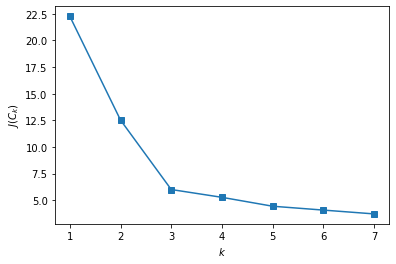

In [6]:
plt.plot(range(1, 8), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$')

Con esta funcion vemos que $J(C_k)$ llega hasta el punto 3, en donde a partir de ahi no tiene cambios grandes, por lo que podemos inferir que ese es el valor optimo de clusters.

Este tipo de problema es np-dificil, ya que su complejidad va en aumento dependiento de las dimensiones, los clusters y el numero de observaciones. La implementacion de este tipo de problema con sklearn tiene la ventaja de su funcion de inicializacion default nos ayuda a identificar centroides robustos. (Existen elementos de programacion en paralelo que tambien pueden implementarse en esta libreria que mejora el tiempo y capacidad computacional del problema).

Existe otra version del algoritmo llamado agrupacion aglomerativa. Esta se encuentra en una libreria llamada scipy. No entraremos a detalle, pero es una opcion que pueden explorar por su cuenta.

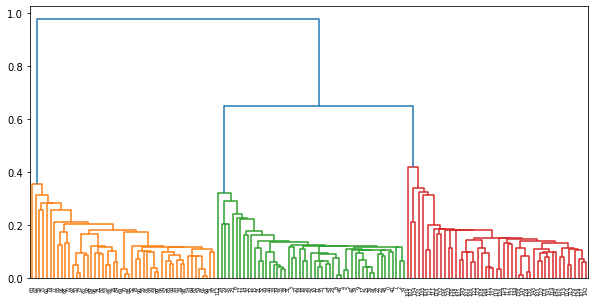

In [7]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

X = np.zeros((150, 2))

np.random.seed(seed=42)
X[:50, 0] = np.random.normal(loc=0.0, scale=.3, size=50)
X[:50, 1] = np.random.normal(loc=0.0, scale=.3, size=50)

X[50:100, 0] = np.random.normal(loc=2.0, scale=.5, size=50)
X[50:100, 1] = np.random.normal(loc=-1.0, scale=.2, size=50)

X[100:150, 0] = np.random.normal(loc=-1.0, scale=.2, size=50)
X[100:150, 1] = np.random.normal(loc=2.0, scale=.5, size=50)

# pdist will calculate the upper triangle of the pairwise distance matrix
distance_mat = pdist(X) 
# linkage — is an implementation if agglomerative algorithm
Z = hierarchy.linkage(distance_mat, 'single')
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=0.5)

# Practica:

Utilizando la libreria de sklearn y la base de datos de iris, realiza el proceso de kmeans. Recuerda que es importante que realices tambien la parte del PCA para reducir dimensiones.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA    #algoritmo de PCA


In [11]:
from sklearn.cluster import KMeans as km
from sklearn.metrics import silhouette_score

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
diabetes=pd.read_csv('/content/drive/MyDrive/Procesamiento de Datos/diabetes.csv')

In [14]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
diab2 = diabetes.drop('Outcome', axis=1)

In [16]:
diab2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [18]:
distortions = []
K = [2,3,4,5,6,7,8,9,10]
for k in K:
  kmeanModel = KMeans(n_clusters=k, n_init=20, max_iter=50)
  kmeanModel.fit(diab2)
  distortions.append(kmeanModel.inertia_)

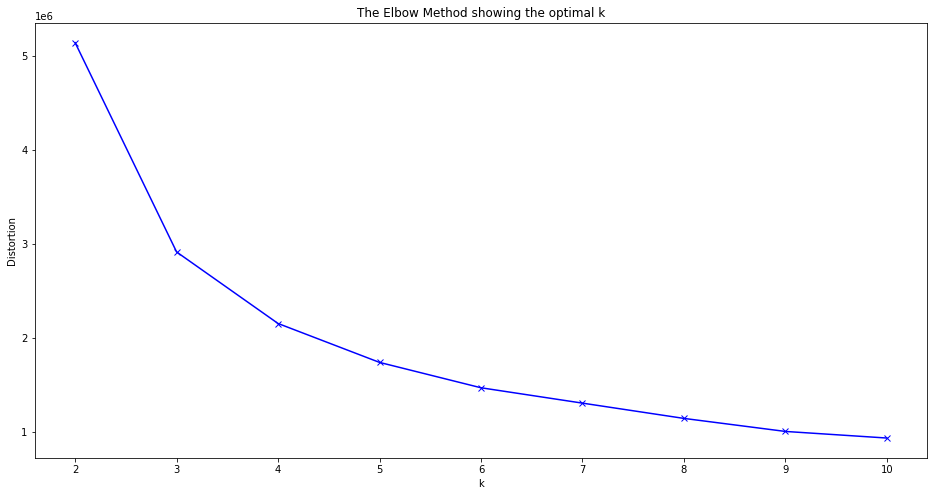

In [19]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [22]:
K = [2,3,4,5,6,7,8,9,10]
for k in K:
  kmeanModel = KMeans(n_clusters=k,n_init=20, max_iter=50)
  kmeanModel.fit(diab2)
  cluster_labels = kmeanModel.labels_
  silhouette_avg=silhouette_score(diab2, cluster_labels)
  print("For cluster={0}, the silhouette score is {1}".format(k,silhouette_avg))

For cluster=2, the silhouette score is 0.5687897205830247
For cluster=3, the silhouette score is 0.5104287492214447
For cluster=4, the silhouette score is 0.425157227030241
For cluster=5, the silhouette score is 0.39516590580935257
For cluster=6, the silhouette score is 0.33413390606676
For cluster=7, the silhouette score is 0.32872886731136247
For cluster=8, the silhouette score is 0.35817691835772086
For cluster=9, the silhouette score is 0.3401828786989493
For cluster=10, the silhouette score is 0.2888400049001916


In [23]:
kmeanModel = KMeans(n_clusters=4, max_iter=50)
kmeanModel.fit(diab2)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=4)

In [25]:
diab3=diabetes
diab3['cluster']=kmeanModel.labels_
diab3.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,cluster
0,6,148,72,35,0,33.6,0.627,50,1,0
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,0
3,1,89,66,23,94,28.1,0.167,21,0,3
4,0,137,40,35,168,43.1,2.288,33,1,1


In [27]:
df2 = diab3.groupby(['Outcome','cluster']).count()
print(df2)

                 Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  \
Outcome cluster                                                                
0       0                277      277            277            277      277   
        1                 54       54             54             54       54   
        2                 10       10             10             10       10   
        3                159      159            159            159      159   
1       0                142      142            142            142      142   
        1                 58       58             58             58       58   
        2                 14       14             14             14       14   
        3                 54       54             54             54       54   

                 BMI  DiabetesPedigreeFunction  Age  
Outcome cluster                                      
0       0        277                       277  277  
        1         54                 

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


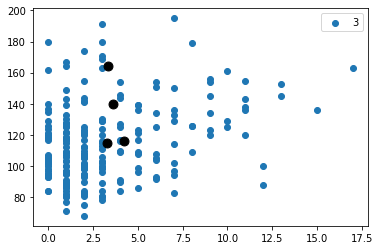

In [29]:
label = kmeanModel.fit_predict(diab2)
centroids = kmeanModel.cluster_centers_
u_labels = np.unique(label)
X= diab2.values
plt.scatter(X[label == i , 0] , X[label == i , 1] ,label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()